# Image classification

In [13]:
import mediapipe as mp
import math

In [1]:
# !wget -O ./models/classifier.tflite -q https://storage.googleapis.com/mediapipe-models/image_classifier/efficientnet_lite0/float32/1/efficientnet_lite0.tflite

In [8]:
model_path = './models/classifier.tflite'

In [9]:
from matplotlib import pyplot as plt
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(images, predictions):
    """Displays a batch of images with the classifications."""
    # Images and predictions.
    images = [image.numpy_view() for image in images]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display.
    for i, (image, prediction) in enumerate(zip(images[:rows*cols], predictions[:rows*cols])):
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        subplot = display_one_image(image, prediction, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Image

https://developers.google.com/mediapipe/solutions/vision/image_classifier

In [10]:
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
ImageClassifier = mp.tasks.vision.ImageClassifier
ImageClassifierOptions = mp.tasks.vision.ImageClassifierOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = ImageClassifierOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    max_results=5,
    running_mode=VisionRunningMode.IMAGE)

In [15]:
IMAGE_FILENAMES = ['./../../../../test_img/f3978ebc-9030-49e7-aa5e-4a370a955e1b.jpg',
                    './../../../../test_img/download.jpg']

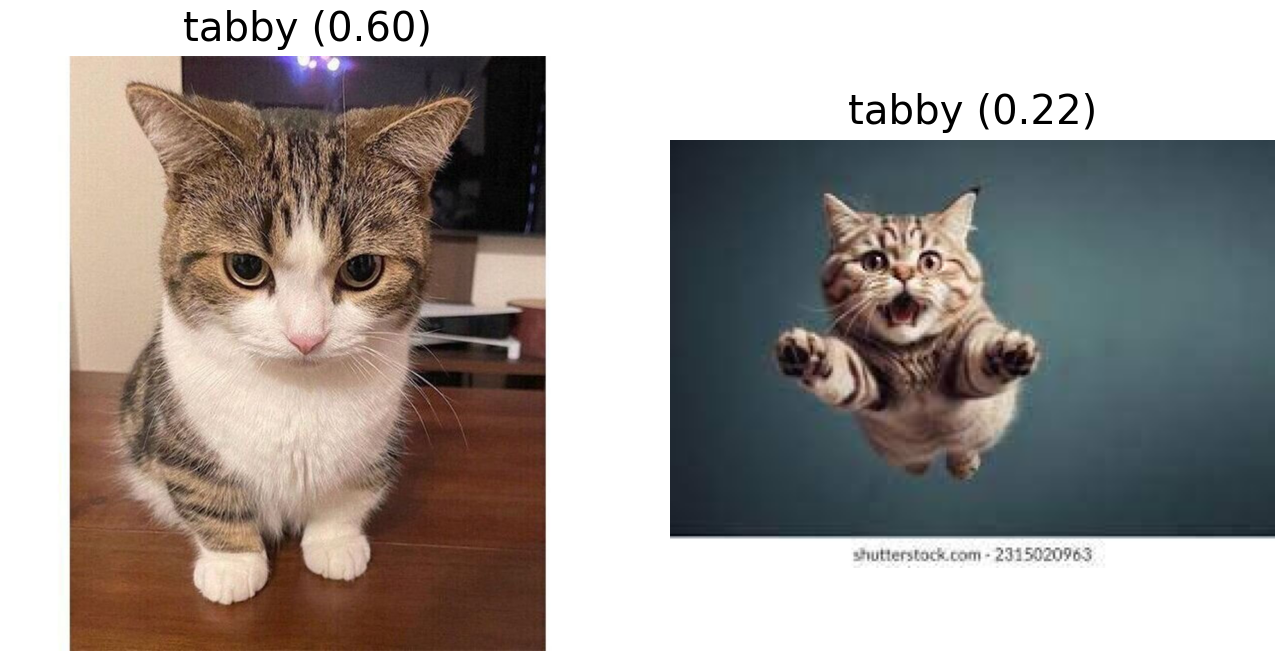

In [16]:
with ImageClassifier.create_from_options(options) as classifier:
  # The classifier is initialized. Use it here.
  # ...
    images = []
    predictions = []
    for image_name in IMAGE_FILENAMES:
        # STEP 3: Load the input image.
        image = mp.Image.create_from_file(image_name)

        # STEP 4: Classify the input image.
        classification_result = classifier.classify(image)

        # STEP 5: Process the classification result. In this case, visualize it.
        images.append(image)
        top_category = classification_result.classifications[0].categories[0]
        predictions.append(f"{top_category.category_name} ({top_category.score:.2f})")

    display_batch_of_images(images, predictions)

## VIDEO, LIVEは必要に応じて